# Distribution Plots

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/bigdatawirtz/datasets/refs/heads/main/datasets/titanic.csv"
df_titanic = pd.read_csv(url)

In [16]:
url = "https://raw.githubusercontent.com/bigdatawirtz/datasets/refs/heads/main/datasets/ny_citibikes_raw.csv"
df_bikes = pd.read_csv(url)
df_bikes.head(3)

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday


In [17]:
url = "https://raw.githubusercontent.com/bigdatawirtz/datasets/refs/heads/main/datasets/meteostat_corunha_2024.csv"
df_meteo = pd.read_csv(url)
df_meteo.head(3)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2024-01-01 00:00:00,11.9,9.9,13.9,0.0,NaN,NaN,16.0,55.5,1017.8,NaN
1,2024-01-02 00:00:00,14.9,12.9,16.9,10.8,NaN,NaN,22.9,83.3,1011.3,NaN
2,2024-01-03 00:00:00,13.4,11.6,15.6,0.4,NaN,NaN,15.9,59.3,1016.6,NaN


## 1.1 Load the weight-height Dataset from datasets repository

https://github.com/bigdatawirtz/datasets

In [18]:
# 1.1 Cargar el dataset de weight-height
url = "https://raw.githubusercontent.com/bigdatawirtz/datasets/refs/heads/main/datasets/weight-height.csv"
df_wh = pd.read_csv(url)

# Ver las primeras filas para comprobar que se cargó bien
df_wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## 1.2 Plot the same histogram data with Seaborn

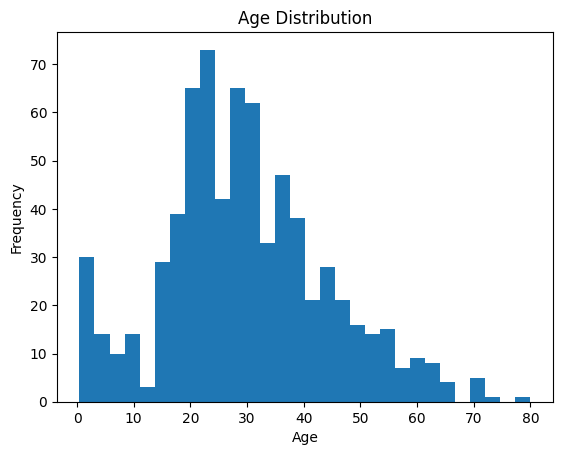

In [19]:
plt.hist(df_titanic['Age'].dropna(), bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

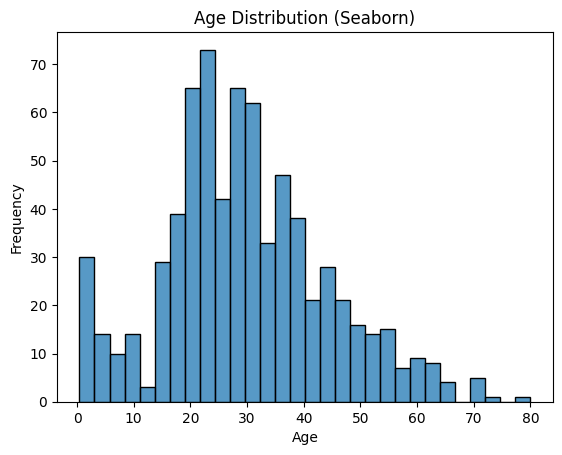

In [20]:
# Histograma de Age con Seaborn
sns.histplot(data=df_titanic, x='Age', bins=30, kde=False)
plt.title("Age Distribution (Seaborn)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## 1.3 Plot the same data with Plotly library

Render in browser

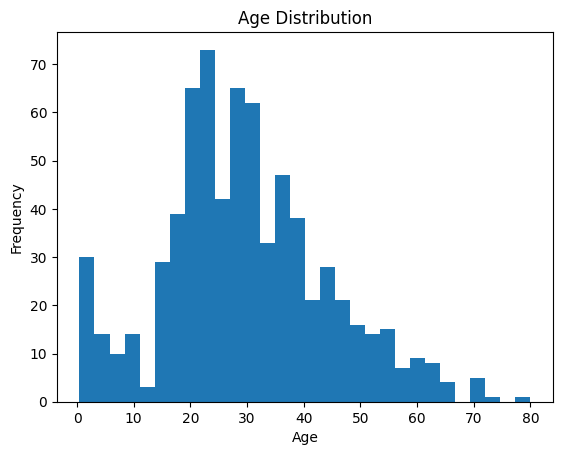

In [21]:
plt.hist(df_titanic['Age'].dropna(), bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

In [22]:
import plotly.express as px

# Histograma interactivo con Plotly
fig = px.histogram(df_titanic, x='Age', nbins=30, title="Age Distribution (Plotly)")
fig.update_layout(bargap=0.1)
fig.show()  # Se abrirá en el navegador o en la vista interactiva del notebook

## 1.4 Plot the histogram for height with seaborn 

What info do you get from this plot? (write in markdown below the plot)

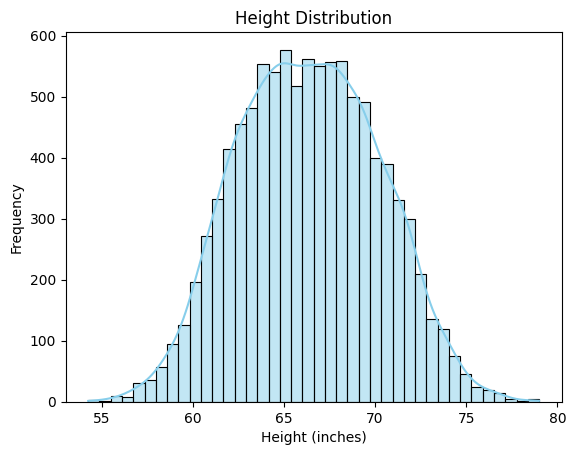

In [23]:
# Histograma de altura con Seaborn
sns.histplot(data=df_wh, x='Height', bins=40, kde=True, color='skyblue')
plt.title('Height Distribution')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

La altura es normal (forma de campana). La mayoría de las personas se concentran entre 62 y 74 pulgadas. Al añadir la curva se aprecia la simetría general.

## 1.5 Plot the histogram for weight with seaborn 

What info do you get from this plot? Do you see anything weird? (write in markdown below the plot)

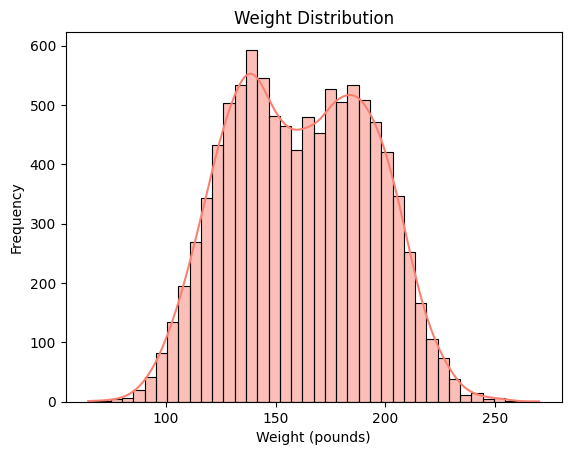

In [24]:
# Histograma de peso con Seaborn
sns.histplot(data=df_wh, x='Weight', bins=40, kde=True, color='salmon')
plt.title('Weight Distribution')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')
plt.show()

La distribución del peso también es normal y bastante parecida a la altura, pero hay una ligera asimetría en la parte alta donde entre 150 y 200 baja un poco y vuelve a subir.

## 1.6 Try the "hue" option with Seaborn histogram on Weight

What info do you get from this plot? (write in markdown below the plot)

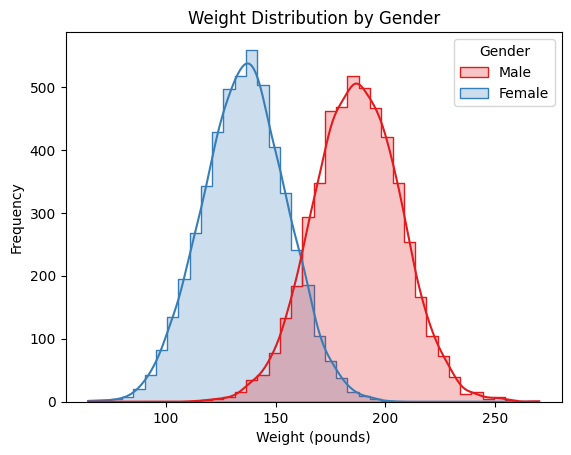

In [25]:
sns.histplot(data=df_wh, x='Weight', bins=40, kde=True, hue='Gender', element='step', palette='Set1')
plt.title('Weight Distribution by Gender')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')
plt.show()

Al separar por género se hace evidente una diferencia:
Los hombres tienen un pico alrededor de 180-200 libras.
Las mujeres tienen un pico alrededor de 130-150 libras.
Esto explica las diferencias que veíamos en el gráfico anterior sin separar por género.

## 1.6 Try the "hue" option with Seaborn histogram on Height

What info do you get from this plot? (write in markdown below the plot)

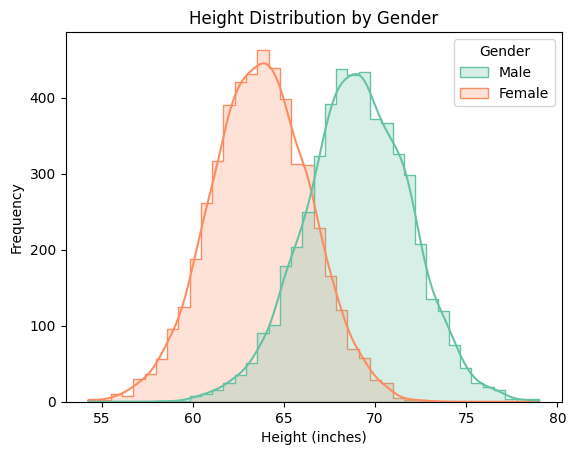

In [26]:
sns.histplot(data=df_wh, x='Height', bins=40, kde=True, hue='Gender', element='step', palette='Set2')
plt.title('Height Distribution by Gender')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

En esta tambien vemos que es muy clara la diferencia en la altura:
Hombres: pico aproximadamente de 70 pulgadas.
Mujeres: pico alrededor de 64 pulgadas.
Hay muy poco solapamiento entre ambos picos, y cada genero por separado sigue una distribución normal.

## 1.7 Convert the data to the International System of Units (SI) and plot

Create a unique double plot for Weight and Height with 'Gender' as 'hue'

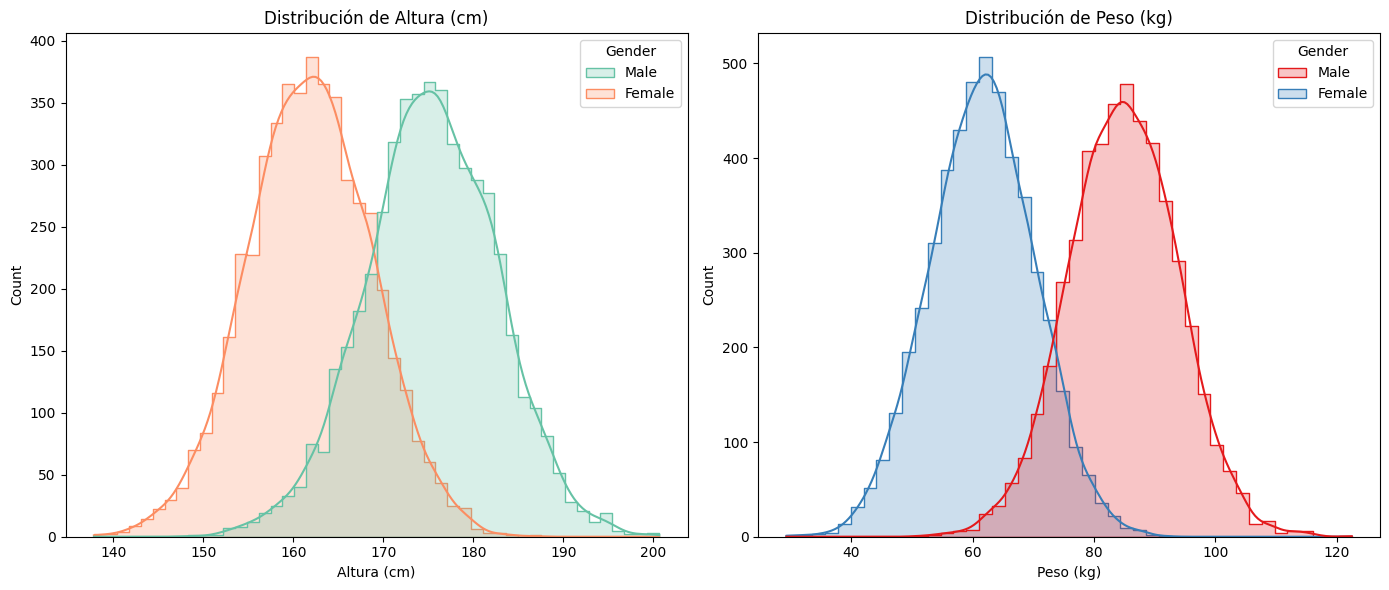

In [27]:
# 1.7 Conversión a SI y gráficos dobles
df_wh['Height_cm'] = df_wh['Height'] * 2.54
df_wh['Weight_kg'] = df_wh['Weight'] * 0.453592

# Crear figura con 2 subplots (Altura y Peso) con hue='Gender'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de Altura en cm
sns.histplot(data=df_wh, x='Height_cm', hue='Gender', kde=True, ax=axes[0], palette='Set2', element='step')
axes[0].set_title('Distribución de Altura (cm)')
axes[0].set_xlabel('Altura (cm)')

# Histograma de Peso en kg
sns.histplot(data=df_wh, x='Weight_kg', hue='Gender', kde=True, ax=axes[1], palette='Set1', element='step')
axes[1].set_title('Distribución de Peso (kg)')
axes[1].set_xlabel('Peso (kg)')

plt.tight_layout()
plt.show()

## 1.8 Plot the same boxplot data with Seaborn

Which one do you think is better and why?

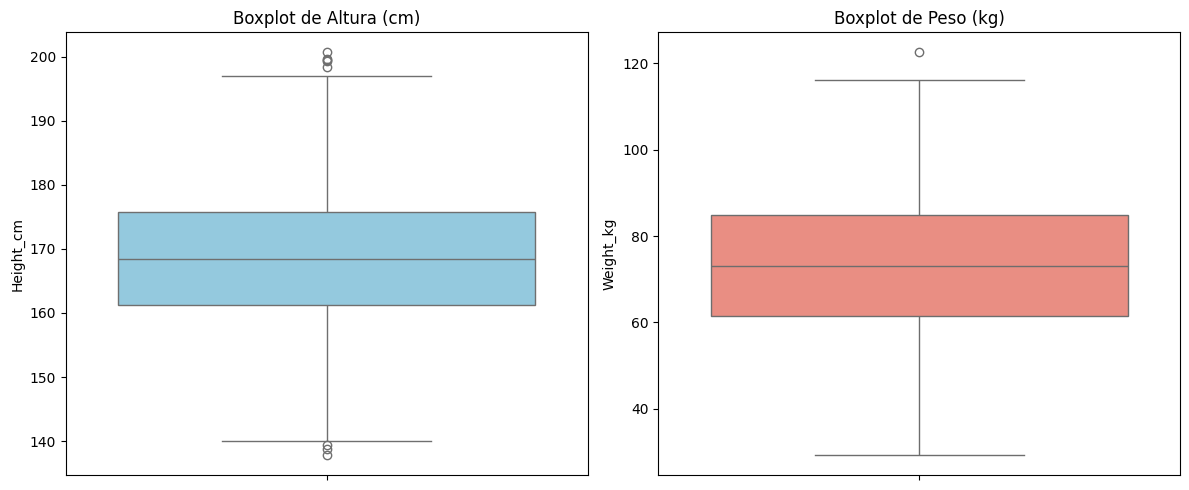

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_wh, y='Height_cm', color='skyblue')
plt.title('Boxplot de Altura (cm)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_wh, y='Weight_kg', color='salmon')
plt.title('Boxplot de Peso (kg)')

plt.tight_layout()
plt.show()

Los boxplots son buenos para visualizar los valores atípicos de forma mas sencilla, mientras que los histogramas son mejores para entender la forma de la distribución (si es normal, bimodal...)

## 1.9 Is there any outlier in height or weight?

Create figure with 2 subplots side by side

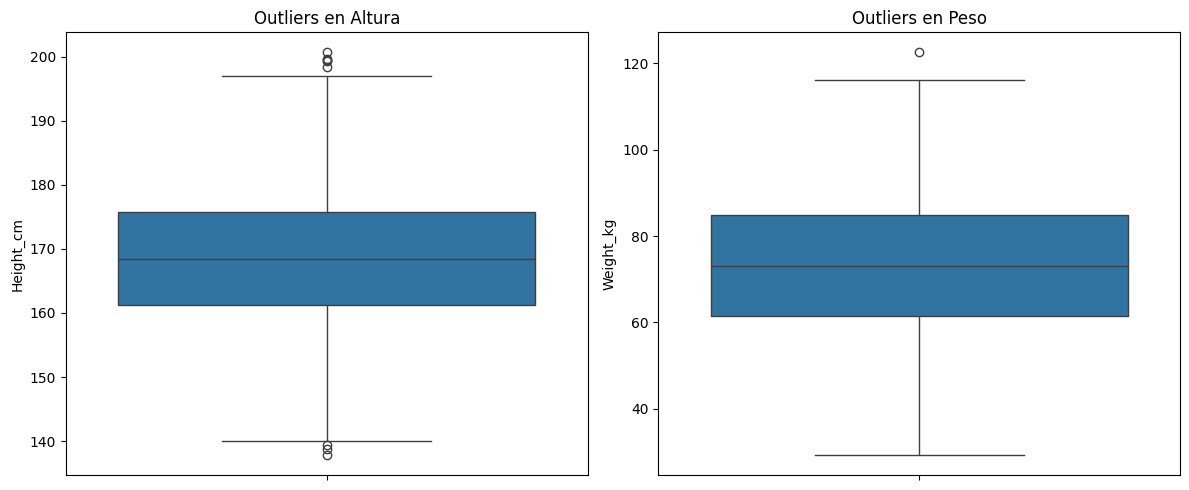

In [29]:
# 1.9 Outliers en altura o peso
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_wh, y='Height_cm', ax=axes[0])
axes[0].set_title('Outliers en Altura')

sns.boxplot(data=df_wh, y='Weight_kg', ax=axes[1])
axes[1].set_title('Outliers en Peso')

plt.tight_layout()
plt.show()

Sí, se ve que hay puntos individuales por encima y por debajo de los demás del boxplot. Esto indica que hay personas con alturas y pesos inusualmente altos o bajos en comparación con la media de la población general analizada.

## 1.10 Is there any change if you consider 'Gender' as 'hue' in the number of outliers?

Create figure with 2 subplots side by side. Try to explain the results. Why is this happening? Can you give some examples?


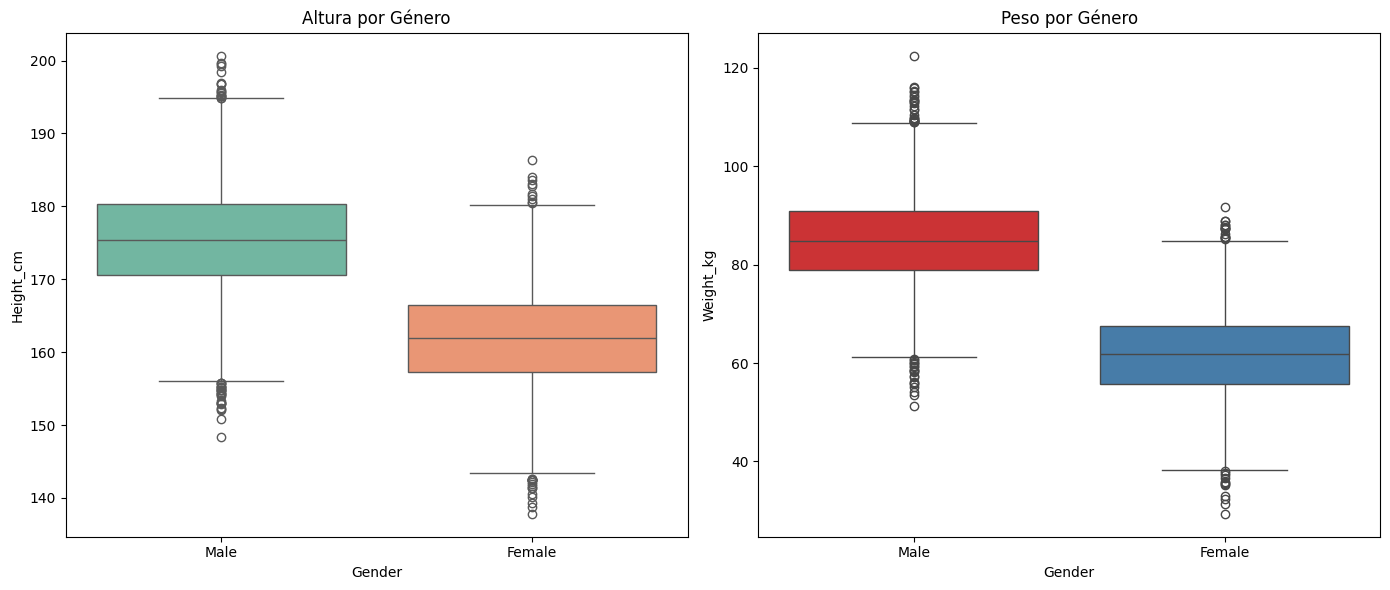

In [31]:
# 1.10 Análisis de outliers por género (Sin warnings)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Altura por Género
sns.boxplot(data=df_wh, x='Gender', y='Height_cm', hue='Gender', 
            palette='Set2', legend=False, ax=axes[0])
axes[0].set_title('Altura por Género')

# Peso por Género
sns.boxplot(data=df_wh, x='Gender', y='Weight_kg', hue='Gender', 
            palette='Set1', legend=False, ax=axes[1])
axes[1].set_title('Peso por Género')

plt.tight_layout()
plt.show()

Esto ocurre por la variabilidad biológica entre hombres y mujeres.

Ejemplo: Una mujer muy alta (ej. 1.85m) podría ser un outlier en la población femenina, pero en el gráfico global (mezclada con hombres) su valor se "normaliza" y deja de parecer atípico.